# 2章: 機械学習で何が出来る？

このノートブックでは、各分類アルゴリズムでの決定境界を可視化します。

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## 各アルゴリズムの決定境界

This code based on [jgbos's notebook](http://nbviewer.jupyter.org/github/jgbos/iPython-Notebooks/blob/master/Comparing%20machine%20learning%20classifiers%20based%20on%20their%20hyperplanes%20or%20decision%20boundaries.ipynb) and [this manual](http://scikit-learn.org/dev/auto_examples/neural_networks/plot_mlp_alpha.html)

In [2]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from numpy.random import normal as rnorm
from matplotlib.colors import ListedColormap

In [3]:
plt.rcParams['font.size'] = 16

def plot_result(clf, clf_name, df, color = False):    
    X = df[['x','y']]
    Y = df['label']
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.4, random_state=40)
    n_classes = len(Y.unique())
    if color == True:
        cm = plt.cm.RdBu
        plot_colors = "rbym"
    else:
        cm = plt.cm.Greys
        plot_colors = "wkym"
    plot_markers = "o^v*"
    plot_step = 0.02
    
    x_min, x_max = X.iloc[:, 0].min() - .5, X.iloc[:, 0].max() + .5
    y_min, y_max = X.iloc[:, 1].min() - .5, X.iloc[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))
    
    clf.fit(X_train,y_train)    
    score = clf.score(X_test, y_test)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cm,  alpha=.5)

    # 学習用の点をプロット
    for i, color, m in zip(range(n_classes), plot_colors, plot_markers):
        if color == True:
            plt.scatter(X[Y==i].x, X[Y==i].y, c=color, label=i, cmap=cm, marker=m, s=80)
        else:
            plt.scatter(X[Y==i].x, X[Y==i].y, facecolor=color, edgecolor='k', label=i, cmap=cm, marker=m, s=80)

    plt.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                    size=15, horizontalalignment='right')        
    plt.title(clf_name)

In [4]:
# 線形分離可能な例

from numpy.random import seed

seed(100)

N = 50
p1 = pd.DataFrame(np.hstack((rnorm(loc=2.0, scale=0.5, size=(N,1)), 
                              rnorm(loc=2.0, scale=0.5, size=(N,1)))),
                   columns=['x','y'])
p1['label'] = 0
p2 = pd.DataFrame(np.hstack((rnorm(loc=1.0, scale=0.5, size=(N,1)), 
                              rnorm(loc=1.0, scale=0.5, size=(N,1)))),
                   columns=['x','y'])
p2['label'] = 1
df = pd.concat([p1, p2])

In [5]:
# XORパターン（線形分離不可能）な例
N = 50
p1 = pd.DataFrame(np.hstack((rnorm(loc=1.0, scale=1.0, size=(N,1)), 
                              rnorm(loc=1.0, scale=1.0, size=(N,1)))),
                   columns=['x','y'])
p1['label'] = 0
p2 = pd.DataFrame(np.hstack((rnorm(loc=-1.0, scale=1.0, size=(N,1)), 
                              rnorm(loc=1.0, scale=1.0, size=(N,1)))),
                   columns=['x','y'])
p2['label'] = 1
p3 = pd.DataFrame(np.hstack((rnorm(loc=-1.0, scale=1.0, size=(N,1)), 
                              rnorm(loc=-1.0, scale=1.0, size=(N,1)))),
                   columns=['x','y'])
p3['label'] = 0
p4 = pd.DataFrame(np.hstack((rnorm(loc=1.0, scale=1.0, size=(N,1)), 
                              rnorm(loc=-1.0, scale=1.0, size=(N,1)))),
                   columns=['x','y'])
p4['label'] = 1
df_xor = pd.concat([p1,p2,p3,p4])

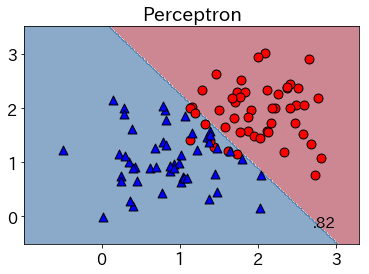

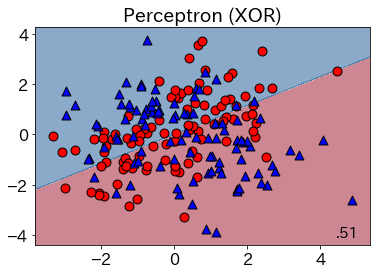

In [6]:
clf = Perceptron(max_iter=1000)

plot_result(clf, 'Perceptron', df, True)
plt.show()
plot_result(clf, 'Perceptron (XOR)', df_xor, True)

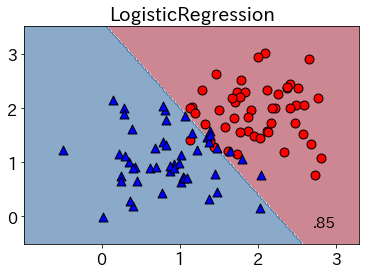

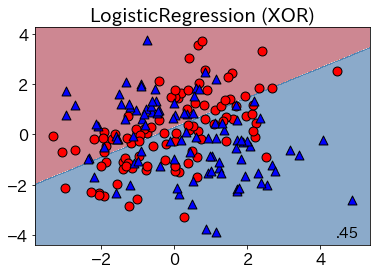

In [7]:
clf = LogisticRegression()
plot_result(clf, 'LogisticRegression', df, True)
plt.show()
plot_result(clf, 'LogisticRegression (XOR)', df_xor, True)

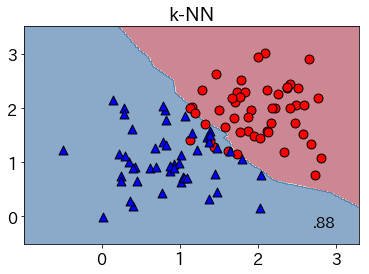

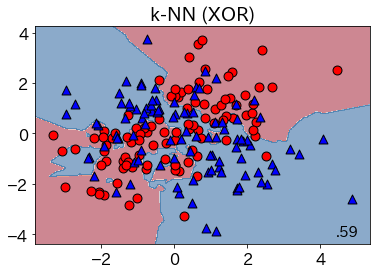

In [8]:
clf = KNeighborsClassifier(3)
plot_result(clf, 'k-NN', df, True)
plt.show()
plot_result(clf, 'k-NN (XOR)', df_xor, True)

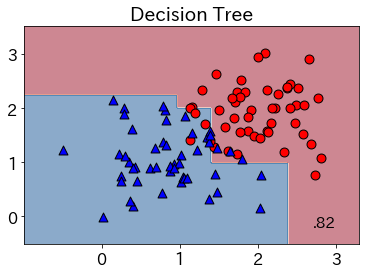

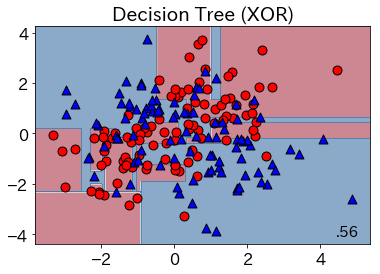

In [9]:
clf = DecisionTreeClassifier()
plot_result(clf, 'Decision Tree', df, True)
plt.show()
plot_result(clf, 'Decision Tree (XOR)', df_xor, True)

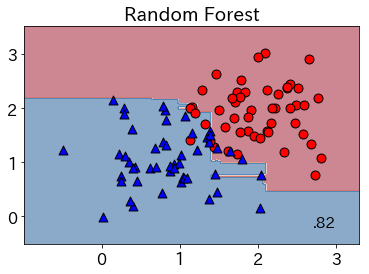

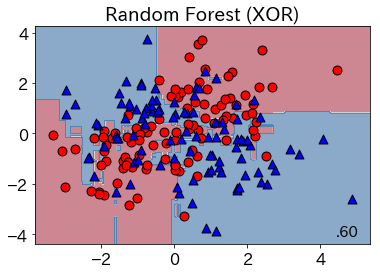

In [10]:
clf = RandomForestClassifier()
plot_result(clf, 'Random Forest', df, True)
plt.show()
plot_result(clf, 'Random Forest (XOR)', df_xor, True)

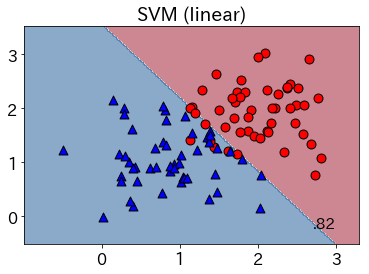

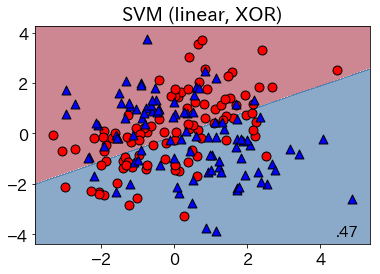

In [11]:
clf = SVC(kernel='linear')
plot_result(clf, 'SVM (linear)', df, True)
plt.show()
plot_result(clf, 'SVM (linear, XOR)', df_xor, True)

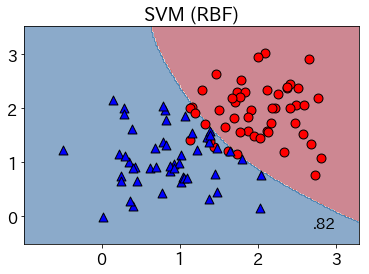

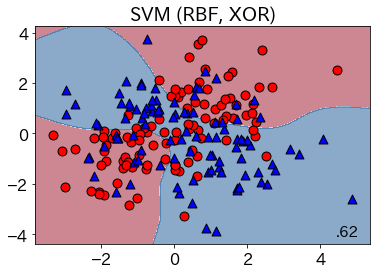

In [12]:
clf = SVC(kernel='rbf')
plot_result(clf, 'SVM (RBF)', df, True)
plt.show()
plot_result(clf, 'SVM (RBF, XOR)', df_xor, True)

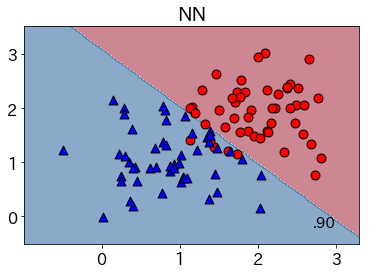

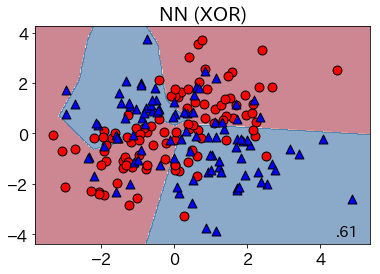

In [13]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=0.01,
                    hidden_layer_sizes=(5, 2), random_state=1)
plot_result(clf, 'NN', df, True)
plt.show()
plot_result(clf, 'NN (XOR)', df_xor, True)

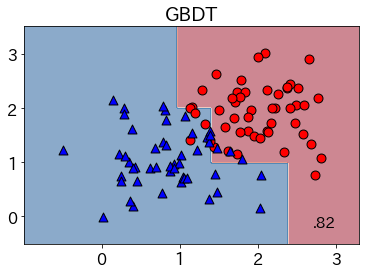

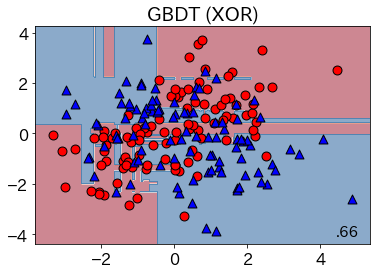

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
plot_result(clf, 'GBDT', df, True)
plt.show()
plot_result(clf, 'GBDT (XOR)', df_xor, True)

In [ ]:
# 追記　pushした時の動きを知りたい。

In [ ]:
# 追記2 これはjupytext を適用した後に、.pyファイルをプッシュしたものの確認